# Preliminary ML Model Results (with Feature Scaling)

In [15]:
import pandas as pd
import numpy as np
import xgboost
import seaborn as sns

import matplotlib.pyplot as plt

import plotly

## Labels

- ER: 
  - 0 = neg
  - 1 = pos
- PR: 
  - 0 = neg
  - 1 = pos
- HER2:
  - 0 = neg
  - 1 = pos
  - 2 = borderline
- Mol Subtype:
  - 0 = luminal-like
  - 1 = ER/PR pos, HER2 pos
  - 2 = HER2
  - 3 = triple negative

In [16]:
labels = pd.read_csv('Patient class labels.csv')
labels.head()

,Patient ID,ER,PR,HER2,Mol Subtype
0,Breast_MRI_001,0,0,1,2
1,Breast_MRI_002,0,0,0,3
2,Breast_MRI_003,1,1,0,0
3,Breast_MRI_004,1,1,0,0
4,Breast_MRI_005,1,0,1,1


In [17]:
features = pd.read_csv('pyradiomics_extraction.csv')
features.head()

,patient,sequence,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,Breast_MRI_001,pre,0.891808,0.850437,29.186299,34.319179,38.431136,36.073737,39.309346,46.240422,...,2.305556e+00,1.440972e-01,1.750000e+00,0.000285,8.618192e+07,5.497338,0.091060,0.000782,3.011166e-07,0.092604
1,Breast_MRI_001,post_1,0.891808,0.850437,29.186299,34.319179,38.431136,36.073737,39.309346,46.240422,...,1.267982e-09,1.267982e-09,-3.203427e-16,0.000036,0.000000e+00,0.000000,1000000.000000,0.000000,0.000000e+00,0.000000
2,Breast_MRI_002,pre,0.668996,0.650923,18.931009,29.083312,29.852205,23.148662,29.748492,33.784677,...,4.661186e-01,4.661186e-01,2.978075e+00,0.005367,2.374784e+06,288.409155,0.001006,0.127011,1.063641e-02,0.001006
3,Breast_MRI_002,post_1,0.668996,0.650923,18.931009,29.083312,29.852205,23.148662,29.748492,33.784677,...,6.046485e-01,6.046485e-01,1.943752e+00,0.001278,1.153687e+07,13.650935,0.018427,0.006934,2.849699e-05,0.018260
4,Breast_MRI_003,pre,0.934408,0.286810,13.808210,48.144081,43.126056,40.488107,56.606869,57.665740,...,1.337012e+00,2.120119e-01,2.846439e+00,0.000240,1.041128e+08,1140.457544,0.000980,0.048920,7.407411e-03,0.000972


In [18]:
pre_features = features[features['sequence'] == 'pre']
total_features = pd.merge(pre_features, labels, left_on = 'patient', right_on = 'Patient ID').drop(columns = 'Patient ID')

In [19]:
total_features

,patient,sequence,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,...,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,ER,PR,HER2,Mol Subtype
0,Breast_MRI_001,pre,0.891808,0.850437,29.186299,34.319179,38.431136,36.073737,39.309346,46.240422,...,8.618192e+07,5.497338,0.091060,0.000782,3.011166e-07,0.092604,0,0,1,2
1,Breast_MRI_002,pre,0.668996,0.650923,18.931009,29.083312,29.852205,23.148662,29.748492,33.784677,...,2.374784e+06,288.409155,0.001006,0.127011,1.063641e-02,0.001006,0,0,0,3
2,Breast_MRI_003,pre,0.934408,0.286810,13.808210,48.144081,43.126056,40.488107,56.606869,57.665740,...,1.041128e+08,1140.457544,0.000980,0.048920,7.407411e-03,0.000972,1,1,0,0
3,Breast_MRI_004,pre,0.707826,0.609522,8.893590,14.591090,14.972284,11.420813,14.477716,16.540987,...,9.257838e+04,13.834676,0.018998,0.059076,1.871148e-03,0.018887,1,1,0,0
4,Breast_MRI_005,pre,0.679296,0.424353,22.534695,53.103672,49.674566,55.175581,36.443449,58.274413,...,5.935692e+06,1166.081998,0.000341,0.127535,2.374788e-02,0.000341,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,Breast_MRI_918,pre,0.877153,0.648783,29.186299,44.986213,41.977361,45.886501,51.383808,56.811793,...,2.595984e+07,347.559346,0.000763,0.039988,1.473374e-03,0.000761,1,1,0,0
918,Breast_MRI_919,pre,0.964239,0.648439,13.914028,21.457727,21.084250,21.631462,25.375225,27.677709,...,1.102838e+07,4.555260,0.110201,0.002182,3.016729e-06,0.105313,1,1,0,0
919,Breast_MRI_920,pre,0.877183,0.856791,15.749673,18.382163,20.649190,19.038279,20.505122,24.348411,...,0.000000e+00,0.000000,1000000.000000,0.000000,0.000000e+00,0.000000,1,1,0,0
920,Breast_MRI_921,pre,0.913000,0.800835,33.226543,41.489900,45.448460,43.076382,48.143552,55.603011,...,1.360858e+07,6049.519483,0.000420,0.102645,2.014567e-02,0.000420,1,1,0,0


## Data Processing and Feature Selection: TODO

# Training

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [21]:
TRAIN_RATIO = 0.6
VAL_RATIO = 0.2
TEST_RATIO = 0.2

SEED = 2454259

In [22]:
def train_test_val_splits(df, train_ratio = 0.8, val_ratio = 0.2, random_state = 2454259):
   
    val_ratio_adj = val_ratio / (1-train_ratio)

    train_df, val_df = train_test_split(df, train_size = train_ratio, random_state= random_state)
    val_df, test_df = train_test_split(val_df, train_size = val_ratio_adj, random_state= random_state)

    print(len(train_df))

    return train_df, val_df, test_df


In [23]:
train_df, val_df, test_df = train_test_val_splits(total_features.drop(columns = ['sequence', 'patient']), TRAIN_RATIO, VAL_RATIO, random_state = SEED)
len(train_df), len(val_df), len(test_df)

553


(553, 184, 185)

In [24]:
train_x, train_y_er, train_y_pr, train_y_her, train_y_mol_subtype = train_df.drop(columns = ['ER', 'PR', 'HER2', 'Mol Subtype']), train_df['ER'], train_df['PR'], train_df['HER2'], train_df['Mol Subtype']
val_x, val_y_er, val_y_pr, val_y_her, val_y_mol_subtype = val_df.drop(columns = ['ER', 'PR', 'HER2', 'Mol Subtype']), val_df['ER'], val_df['PR'], val_df['HER2'], val_df['Mol Subtype']
test_x, test_y_er, test_y_pr, test_y_her, test_y_mol_subtype = test_df.drop(columns = ['ER', 'PR', 'HER2', 'Mol Subtype']), test_df['ER'], test_df['PR'], test_df['HER2'], test_df['Mol Subtype']

### Class distribution in the train, val and test splits

In [25]:
print("Train ER neg: {}, pos: {}\nVal ER neg: {}, pos: {}\nTest ER neg: {}, pos: {}".format(train_y_er.value_counts()[0], train_y_er.value_counts()[1],
                                                                                           val_y_er.value_counts()[0]    , val_y_er.value_counts()[1],
                                                                                           test_y_er.value_counts()[0]   , test_y_er.value_counts()[1])
)

Train ER neg: 139, pos: 414
Val ER neg: 46, pos: 138
Test ER neg: 51, pos: 134


In [26]:
print("Train PR neg: {}, pos: {}\nVal PR neg: {}, pos: {}\nTest PR neg: {}, pos: {}".format(train_y_pr.value_counts()[0]  , train_y_pr.value_counts()[1],
                                                                                           val_y_pr.value_counts()[0]    , val_y_pr.value_counts()[1],
                                                                                           test_y_pr.value_counts()[0]   , test_y_pr.value_counts()[1])
)

Train PR neg: 194, pos: 359
Val PR neg: 66, pos: 118
Test PR neg: 64, pos: 121


In [27]:
print("Train HER neg: {}, pos: {}\nVal HER neg: {}, pos: {}\nTest HER neg: {}, pos: {}".format(
                                                                                           train_y_her.value_counts()[0]  , train_y_her.value_counts()[1],
                                                                                           val_y_her.value_counts()[0]    , val_y_her.value_counts()[1],
                                                                                           test_y_her.value_counts()[0]   , test_y_her.value_counts()[1])
)

Train HER neg: 452, pos: 101
Val HER neg: 153, pos: 31
Test HER neg: 154, pos: 31


In [28]:
def train_pipeline(model, trainx, trainy, valx, valy):
    model.fit(trainx, trainy)
    preds = model.predict(trainx)
    preds_val = model.predict(valx)

    acc_train, acc_val = accuracy_score(trainy, preds), accuracy_score(valy, preds_val)
    prec_train, prec_val = precision_score(trainy, preds), precision_score(valy, preds_val)
    rec_train, rec_val = recall_score(trainy, preds), recall_score(valy, preds_val)
    f1_train, f1_val = f1_score(trainy, preds), f1_score(valy, preds_val)

    metrics = {'train_acc' : acc_train, 'val_acc' : acc_val,
               'train_prec': prec_train, 'val_prec': prec_val,
               'train_rec' : rec_train,  'val_rec' : rec_val,
               'train_f1' : f1_train, 'val_f1': f1_val}


    print("Training Accuracy: {:.4f}, Validation Accuracy: {:.4f}".format(acc_train, acc_val))
    print("Training Precision: {:.4f}, Validation Precision: {:.4f}".format(prec_train, prec_val))
    print("Training Recall: {:.4f}, Validation Recall: {:.4f}".format(rec_train, rec_val))
    print("Training F1-Score: {:.4f}, Validation F1-Score: {:.4f}".format(f1_train, f1_val))

    return model, metrics

In [29]:
def get_classification_report(model, trainx, trainy, valx, valy, testx, testy, class_names, title, subtype = None):
    model, metrics = train_pipeline(model, trainx, trainy, valx, valy)
    pred = model.predict(testx)


    acc_test = accuracy_score(testy, pred)
    prec_test = precision_score(testy, pred)
    rec_test = recall_score(testy, pred)
    f1_test = f1_score(testy, pred)


    metrics.update(
              {'test_acc' : acc_test,
               'test_prec': prec_test,
               'test_rec' : rec_test,
               'test_f1' : f1_test})
    cls_report = classification_report(testy, pred, target_names = class_names, output_dict = True)
    sns.heatmap(pd.DataFrame(cls_report).iloc[:-1, :].T, annot=True)
    plt.title(title)
    return metrics, model

## ER subtype

In [30]:
classification_results = pd.DataFrame()

### Naive Bayes

Training Accuracy: 0.7613, Validation Accuracy: 0.7554
Training Precision: 0.7681, Validation Precision: 0.7598
Training Recall: 0.9758, Validation Recall: 0.9855
Training F1-Score: 0.8596, Validation F1-Score: 0.8580


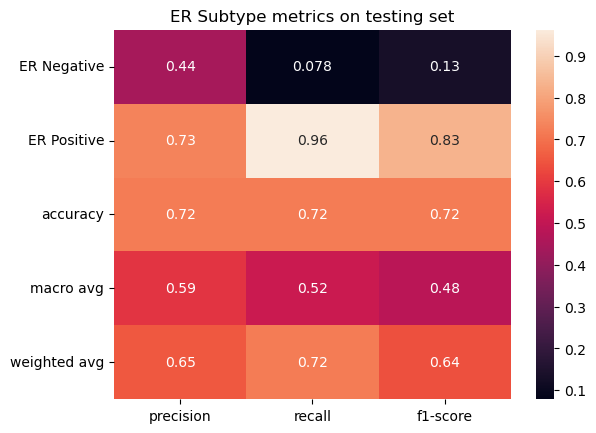

In [31]:
nb_er = GaussianNB()
report, nb_er = get_classification_report(nb_er, train_x, train_y_er, val_x, val_y_er, test_x, test_y_er, ['ER Negative', 'ER Positive'], 'ER Subtype metrics on testing set', subtype = 'ER')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Naive Bayes'
result['Subtype'] = 'ER'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.6835, Validation Accuracy: 0.6522
Training Precision: 0.6756, Validation Precision: 0.6534
Training Recall: 0.9861, Validation Recall: 0.9746
Training F1-Score: 0.8018, Validation F1-Score: 0.7823


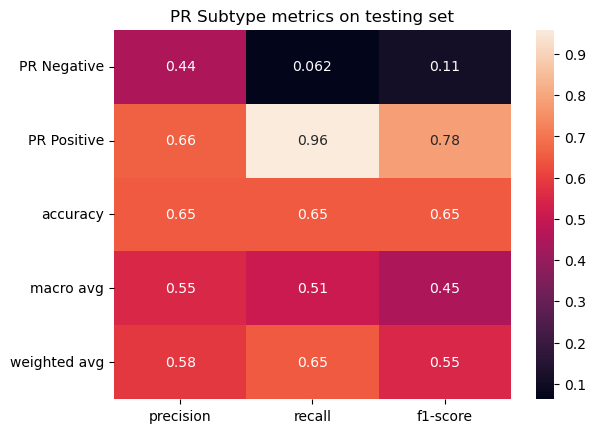

In [32]:
nb_pr = GaussianNB()
report, nb_pr = get_classification_report(nb_er, train_x, train_y_pr, val_x, val_y_pr, test_x, test_y_pr, ['PR Negative', 'PR Positive'], 'PR Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Naive Bayes'
result['Subtype'] = 'PR'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.2206, Validation Accuracy: 0.2120
Training Precision: 0.1827, Validation Precision: 0.1724
Training Recall: 0.9406, Validation Recall: 0.9677
Training F1-Score: 0.3060, Validation F1-Score: 0.2927


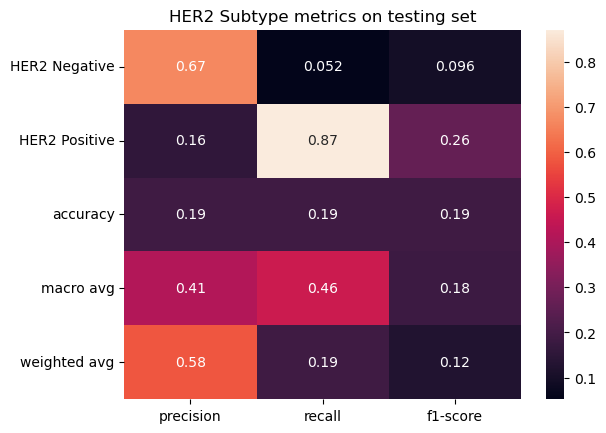

In [33]:
nb_her2 = GaussianNB()
report, nb_her2 = get_classification_report(nb_her2, train_x, train_y_her, val_x, val_y_her, test_x, test_y_her, ['HER2 Negative', 'HER2 Positive'], 'HER2 Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Naive Bayes'
result['Subtype'] = 'HER2'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

### Logistic Regression

Training Accuracy: 0.7396, Validation Accuracy: 0.7391
Training Precision: 0.7538, Validation Precision: 0.7528
Training Recall: 0.9686, Validation Recall: 0.9710
Training F1-Score: 0.8478, Validation F1-Score: 0.8481


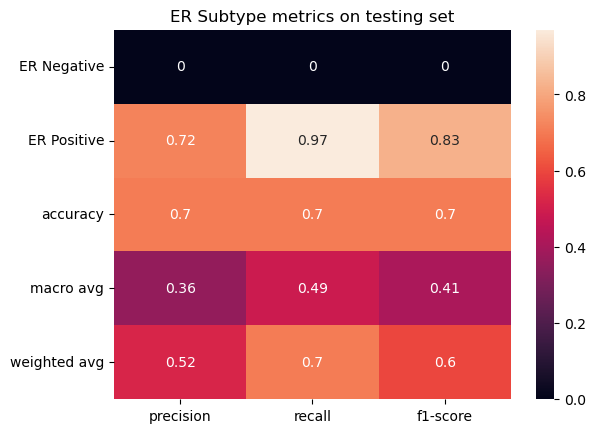

In [34]:
logreg_er = LogisticRegression()
report, logreg_er = get_classification_report(logreg_er, train_x, train_y_er, val_x, val_y_er, test_x, test_y_er, ['ER Negative', 'ER Positive'], 'ER Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Logistic Regression'
result['Subtype'] = 'ER'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.5552, Validation Accuracy: 0.5217
Training Precision: 0.6996, Validation Precision: 0.6562
Training Recall: 0.5515, Validation Recall: 0.5339
Training F1-Score: 0.6168, Validation F1-Score: 0.5888


,Algorithm,Subtype,train_acc,val_acc,train_prec,val_prec,train_rec,val_rec,train_f1,val_f1,test_acc,test_prec,test_rec,test_f1
0,Naive Bayes,ER,0.761302,0.755435,0.768061,0.759777,0.975845,0.985507,0.859574,0.858044,0.718919,0.732955,0.962687,0.832258
0,Naive Bayes,PR,0.683544,0.652174,0.675573,0.653409,0.986072,0.974576,0.801812,0.782313,0.648649,0.659091,0.958678,0.781145
0,Naive Bayes,HER2,0.220615,0.211957,0.182692,0.172414,0.940594,0.967742,0.305958,0.292683,0.189189,0.156069,0.870968,0.264706
0,Logistic Regression,ER,0.739602,0.739130,0.753759,0.752809,0.968599,0.971014,0.847780,0.848101,0.702703,0.718232,0.970149,0.825397
0,Logistic Regression,PR,0.555154,0.521739,0.699647,0.656250,0.551532,0.533898,0.616822,0.588785,0.529730,0.654545,0.595041,0.623377


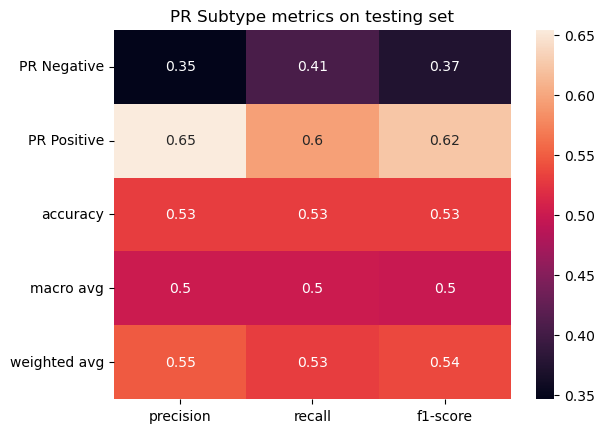

In [35]:
logreg_pr = LogisticRegression()
report, logreg_pr = get_classification_report(logreg_pr, train_x, train_y_pr, val_x, val_y_pr, test_x, test_y_pr, ['PR Negative', 'PR Positive'], 'PR Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Logistic Regression'
result['Subtype'] = 'PR'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

classification_results

Training Accuracy: 0.8156, Validation Accuracy: 0.8315
Training Precision: 0.0000, Validation Precision: 0.0000
Training Recall: 0.0000, Validation Recall: 0.0000
Training F1-Score: 0.0000, Validation F1-Score: 0.0000


c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-package

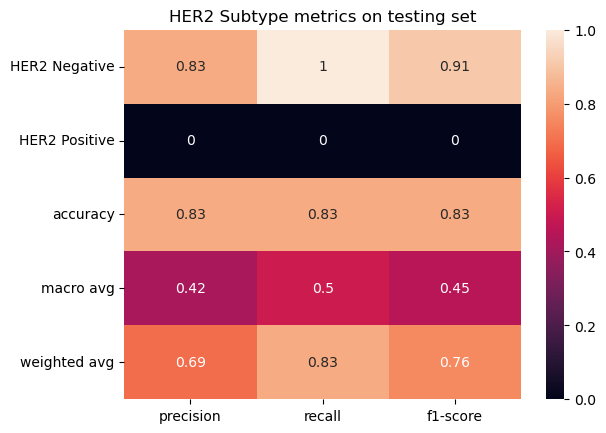

In [36]:
logreg_her2 = LogisticRegression()
report, logreg_her2 = get_classification_report(logreg_her2, train_x, train_y_her, val_x, val_y_her, test_x, test_y_her, ['HER2 Negative', 'HER2 Positive'], 'HER2 Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Logistic Regression'
result['Subtype'] = 'HER2'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

### Decision Tree

Training Accuracy: 0.7685, Validation Accuracy: 0.7337
Training Precision: 0.7638, Validation Precision: 0.7459
Training Recall: 1.0000, Validation Recall: 0.9783
Training F1-Score: 0.8661, Validation F1-Score: 0.8464


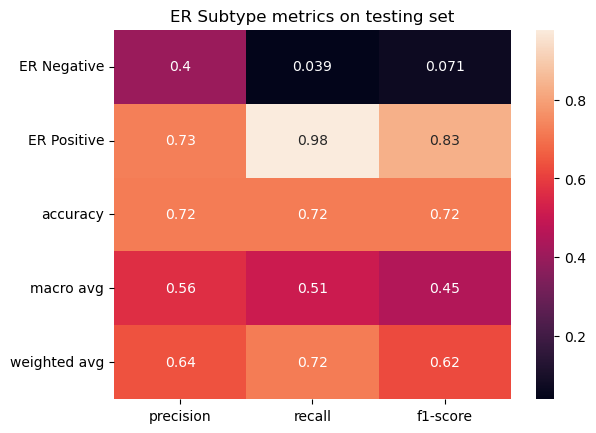

In [37]:
tree_er = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
report, tree_er = get_classification_report(tree_er, train_x, train_y_er, val_x, val_y_er, test_x, test_y_er, ['ER Negative', 'ER Positive'], 'ER Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Decision Tree'
result['Subtype'] = 'ER'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.7450, Validation Accuracy: 0.6467
Training Precision: 0.7252, Validation Precision: 0.6606
Training Recall: 0.9777, Validation Recall: 0.9237
Training F1-Score: 0.8327, Validation F1-Score: 0.7703


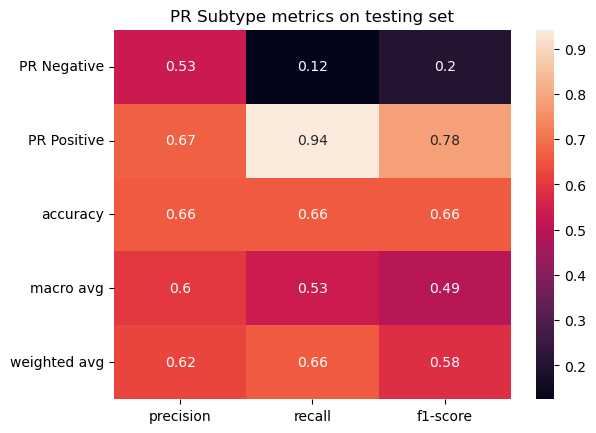

In [38]:
tree_pr = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
report, tree_pr = get_classification_report(tree_pr, train_x, train_y_pr, val_x, val_y_pr, test_x, test_y_pr, ['PR Negative', 'PR Positive'], 'PR Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Decision Tree'
result['Subtype'] = 'PR'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.9168, Validation Accuracy: 0.7880
Training Precision: 0.9104, Validation Precision: 0.3667
Training Recall: 0.6040, Validation Recall: 0.3548
Training F1-Score: 0.7262, Validation F1-Score: 0.3607


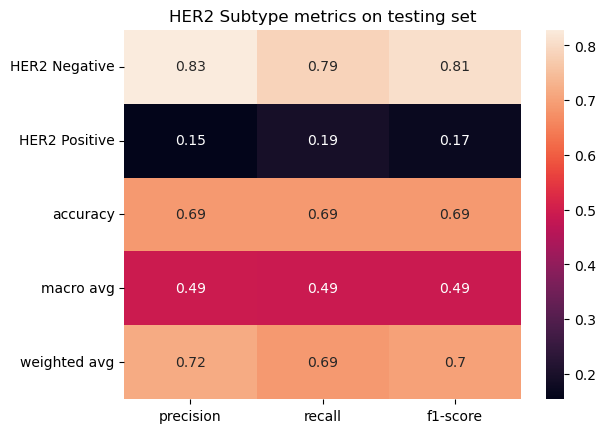

In [39]:
tree_her2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 8)
report, tree_her2 = get_classification_report(tree_her2, train_x, train_y_her, val_x, val_y_her, test_x, test_y_her, ['HER2 Negative', 'HER2 Positive'], 'HER2 Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Decision Tree'
result['Subtype'] = 'HER2'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

### RandomForest

Training Accuracy: 0.8192, Validation Accuracy: 0.7554
Training Precision: 0.8054, Validation Precision: 0.7657
Training Recall: 1.0000, Validation Recall: 0.9710
Training F1-Score: 0.8922, Validation F1-Score: 0.8562


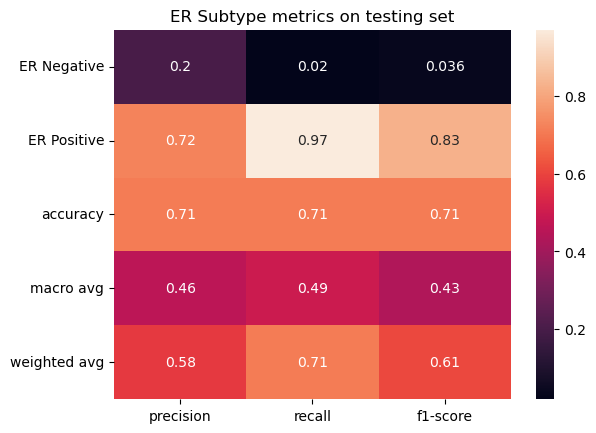

In [40]:
forest_er = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth = 6)
report, forest_er = get_classification_report(forest_er, train_x, train_y_er, val_x, val_y_er, test_x, test_y_er, ['ER Negative', 'ER Positive'], 'ER Subtype metrics on testing set')


result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Random Forest'
result['Subtype'] = 'ER'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 1.0000, Validation Accuracy: 0.6033
Training Precision: 1.0000, Validation Precision: 0.6718
Training Recall: 1.0000, Validation Recall: 0.7458
Training F1-Score: 1.0000, Validation F1-Score: 0.7068


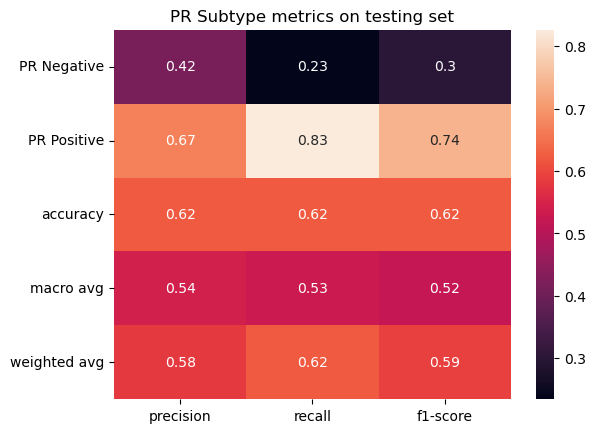

In [41]:
forest_pr = RandomForestClassifier(n_estimators = 20, criterion = 'gini', max_depth = 15)
report, forest_pr = get_classification_report(forest_pr, train_x, train_y_pr, val_x, val_y_pr, test_x, test_y_pr, ['PR Negative', 'PR Positive'], 'PR Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Random Forest'
result['Subtype'] = 'PR'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 1.0000, Validation Accuracy: 0.8261
Training Precision: 1.0000, Validation Precision: 0.3333
Training Recall: 1.0000, Validation Recall: 0.0323
Training F1-Score: 1.0000, Validation F1-Score: 0.0588


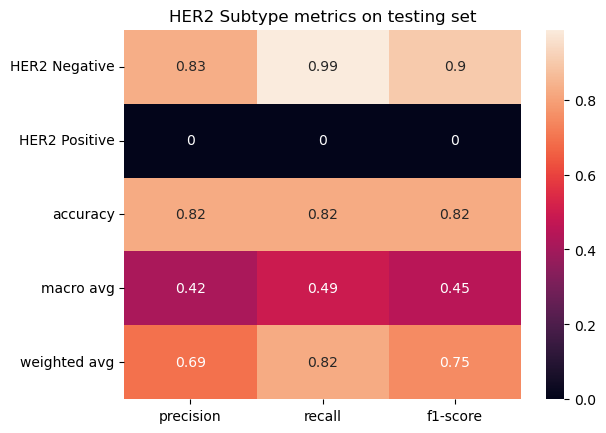

In [42]:
forest_her2 = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth = 20)
report, forest_her2 = get_classification_report(forest_her2, train_x, train_y_her, val_x, val_y_her, test_x, test_y_her, ['HER2 Negative', 'HER2 Positive'], 'HER2 Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'Random Forest'
result['Subtype'] = 'HER2'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

### XGBoost

Training Accuracy: 1.0000, Validation Accuracy: 0.6957
Training Precision: 1.0000, Validation Precision: 0.7562
Training Recall: 1.0000, Validation Recall: 0.8768
Training F1-Score: 1.0000, Validation F1-Score: 0.8121


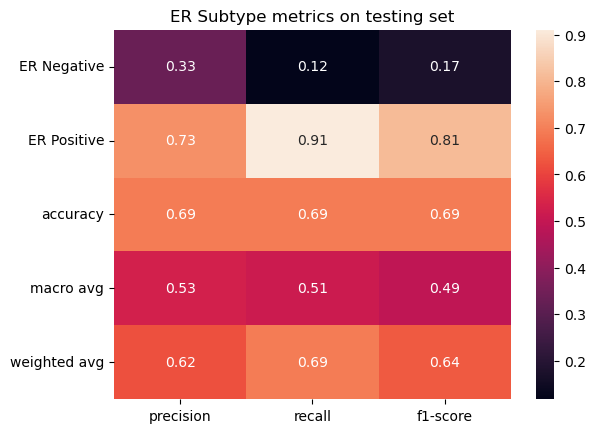

In [43]:
xgb_er = xgb.XGBClassifier(n_estimators = 20, max_depth = 10, max_leaves = 20)
report, xgb_er = get_classification_report(xgb_er, train_x, train_y_er, val_x, val_y_er, test_x, test_y_er, ['ER Negative', 'ER Positive'], 'ER Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'XGBoost'
result['Subtype'] = 'ER'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 0.9982, Validation Accuracy: 0.6087
Training Precision: 0.9972, Validation Precision: 0.6643
Training Recall: 1.0000, Validation Recall: 0.7881
Training F1-Score: 0.9986, Validation F1-Score: 0.7209


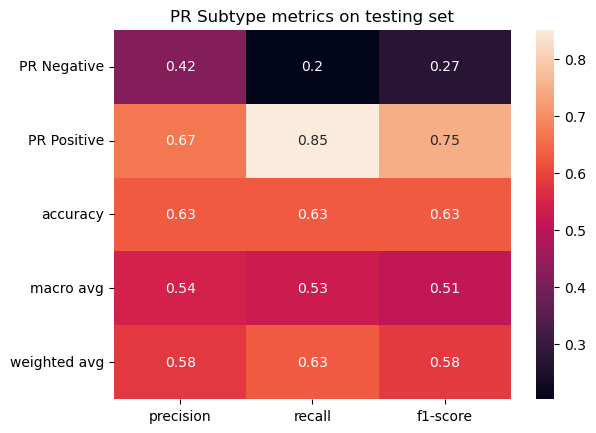

In [44]:
xgb_pr = xgb.XGBClassifier(n_estimators = 20, max_leaves = 20)
report, xgb_pr = get_classification_report(xgb_pr, train_x, train_y_pr, val_x, val_y_pr, test_x, test_y_pr, ['PR Negative', 'PR Positive'], 'PR Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'XGBoost'
result['Subtype'] = 'PR'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 1.0000, Validation Accuracy: 0.8043
Training Precision: 1.0000, Validation Precision: 0.3077
Training Recall: 1.0000, Validation Recall: 0.1290
Training F1-Score: 1.0000, Validation F1-Score: 0.1818


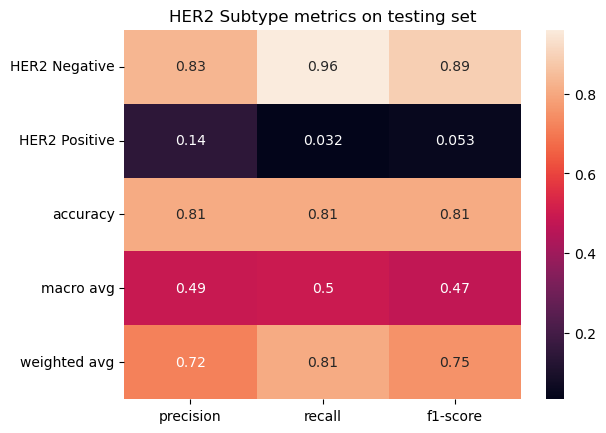

In [45]:
xgb_her2 = xgb.XGBClassifier(n_estimators = 100, max_leaves = 20)
report, nb_pr = get_classification_report(xgb_her2, train_x, train_y_her, val_x, val_y_her, test_x, test_y_her, ['HER2 Negative', 'HER2 Positive'], 'HER2 Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'XGBoost'
result['Subtype'] = 'HER2'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

### SVM

Training Accuracy: 1.0000, Validation Accuracy: 0.7500
Training Precision: 1.0000, Validation Precision: 0.7500
Training Recall: 1.0000, Validation Recall: 1.0000
Training F1-Score: 1.0000, Validation F1-Score: 0.8571


c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


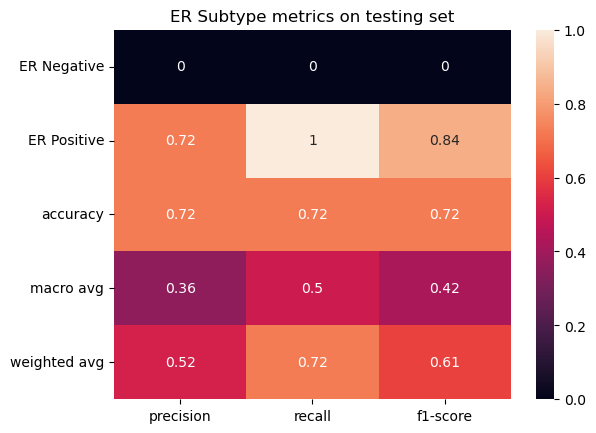

In [46]:
svm_er = SVC(C = 1, kernel = 'rbf', degree = 3, gamma = 'auto')
report, svm_er = get_classification_report(svm_er, train_x, train_y_er, val_x, val_y_er, test_x, test_y_er, ['ER Negative', 'ER Positive'], 'ER Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'SVM'
result['Subtype'] = 'ER'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 1.0000, Validation Accuracy: 0.6413
Training Precision: 1.0000, Validation Precision: 0.6413
Training Recall: 1.0000, Validation Recall: 1.0000
Training F1-Score: 1.0000, Validation F1-Score: 0.7815


c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


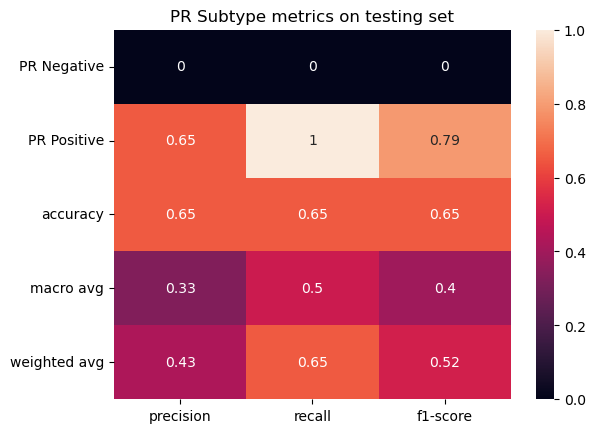

In [47]:
svm_pr = SVC(C = 1, kernel = 'rbf', degree = 3, gamma = 'auto')
report, svm_pr = get_classification_report(svm_pr, train_x, train_y_pr, val_x, val_y_pr, test_x, test_y_pr, ['PR Negative', 'PR Positive'], 'PR Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'SVM'
result['Subtype'] = 'PR'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

Training Accuracy: 1.0000, Validation Accuracy: 0.8315
Training Precision: 1.0000, Validation Precision: 0.0000
Training Recall: 1.0000, Validation Recall: 0.0000
Training F1-Score: 1.0000, Validation F1-Score: 0.0000


c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\torchnew\Lib\site-package

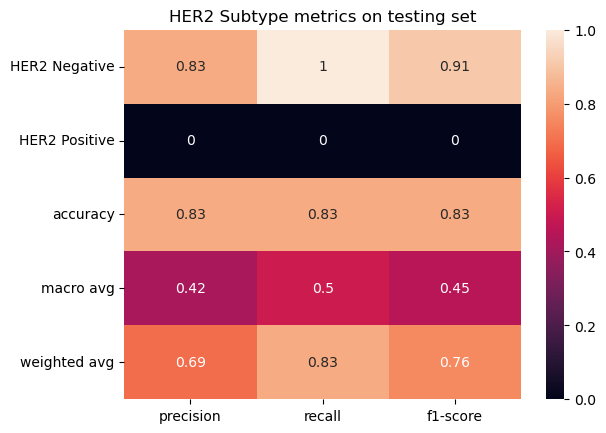

In [48]:
svm_her2 = SVC(C = 1, kernel = 'rbf', degree = 3, gamma = 'auto')
report, svm_her2 = get_classification_report(svm_pr, train_x, train_y_her, val_x, val_y_her, test_x, test_y_her, ['HER2 Negative', 'HER2 Positive'], 'HER2 Subtype metrics on testing set')

result = pd.DataFrame(report, index = [0])
result['Algorithm'] = 'SVM'
result['Subtype'] = 'HER2'
result = result[list(result.columns[-2:]) + list(result.columns[:-2])]
classification_results = pd.concat([classification_results, result])

## Classification scores

In [49]:
classification_results.reset_index(drop = True, inplace = True)
classification_results

,Algorithm,Subtype,train_acc,val_acc,train_prec,val_prec,train_rec,val_rec,train_f1,val_f1,test_acc,test_prec,test_rec,test_f1
0,Naive Bayes,ER,0.761302,0.755435,0.768061,0.759777,0.975845,0.985507,0.859574,0.858044,0.718919,0.732955,0.962687,0.832258
1,Naive Bayes,PR,0.683544,0.652174,0.675573,0.653409,0.986072,0.974576,0.801812,0.782313,0.648649,0.659091,0.958678,0.781145
2,Naive Bayes,HER2,0.220615,0.211957,0.182692,0.172414,0.940594,0.967742,0.305958,0.292683,0.189189,0.156069,0.870968,0.264706
3,Logistic Regression,ER,0.739602,0.739130,0.753759,0.752809,0.968599,0.971014,0.847780,0.848101,0.702703,0.718232,0.970149,0.825397
4,Logistic Regression,PR,0.555154,0.521739,0.699647,0.656250,0.551532,0.533898,0.616822,0.588785,0.529730,0.654545,0.595041,0.623377
5,Logistic Regression,HER2,0.815552,0.831522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.832432,0.000000,0.000000,0.000000
6,Decision Tree,ER,0.768535,0.733696,0.763838,0.745856,1.000000,0.978261,0.866109,0.846395,0.718919,0.727778,0.977612,0.834395
7,Decision Tree,PR,0.745027,0.646739,0.725207,0.660606,0.977716,0.923729,0.832740,0.770318,0.659459,0.670588,0.942149,0.783505
8,Decision Tree,HER2,0.916817,0.788043,0.910448,0.366667,0.603960,0.354839,0.726190,0.360656,0.686486,0.153846,0.193548,0.171429
9,Random Forest,ER,0.819168,0.755435,0.805447,0.765714,1.000000,0.971014,0.892241,0.856230,0.708108,0.722222,0.970149,0.828025


In [50]:
classification_results.to_csv("Classification results/With feature scaling results.csv", index = False)